# Figure 2. PCA & t-SNE of Each Cancer 

In [ ]:
import pandas as pd
import numpy as np
import os

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## Load Data

In [ ]:
df_001 = pd.read_csv('New_Data/SLC_biomarker_innerjoin_001.csv')
df = pd.read_csv('New_Data/TCGA_GTEX_SLC_103.csv')
df_label = pd.read_csv('New_Data/Cancer_label_19.csv')

## Preprocessing

In [ ]:
category = df_001['category'].unique()

# 각 암종별 biomarker
slc_cat = []
for i in category:
    slc = []
    df_ = df_001[df_001['category'] == i]

    if len(df_) != 0 : 
        slc = df_[df_['category']== i]['SLC'].unique()

    slc_cat.append((i, slc.tolist()))

cancer_df = pd.DataFrame(slc_cat, columns=['cancer','SLC'])
cancer_df['count']=0

for i in range(0,len(cancer_df)):
    cancer_df['count'][i]=len(cancer_df['SLC'][i])

cancer_df.sort_values('count',ascending=False,inplace=True) #cancer별 SLC biomarker list와 count, count로 정렬
cancer_df.to_csv('./New_Data/Cancer_SLClist_001.csv',index=False)

In [ ]:
df_base = df.drop(columns=['sample', 'TCGA_GTEX_main_category', 'cancer'])
cancer_label = pd.merge(cancer_df, df_label, on='cancer', how='left') #SLC 발현량 table에 label column 추가

for i in cancer_label['label_GTEx_100']:
    df_ = df_base[df_base['label']== i].drop('label', axis=1)
    #df_ = df_base[(df_base['label']== i)|(df_base['label']== 100)]
    df_.rename(columns={'label_GTEx_100':'label'}, inplace=True)
    num = cancer_label[cancer_label['label_GTEx_100']==i]['SLC'].index[0]
    slc = cancer_label['SLC'][num]
    data = df_.loc[:, slc]
    data = pd.concat([data, df_[['label']]], axis=1)
    name = cancer_label[cancer_label['label_GTEx_100']==i]['cancer'].values[0]
    data.to_csv(f'./New_Data/cancer_biomarker/103/{name}.csv', index=False)

## PCA

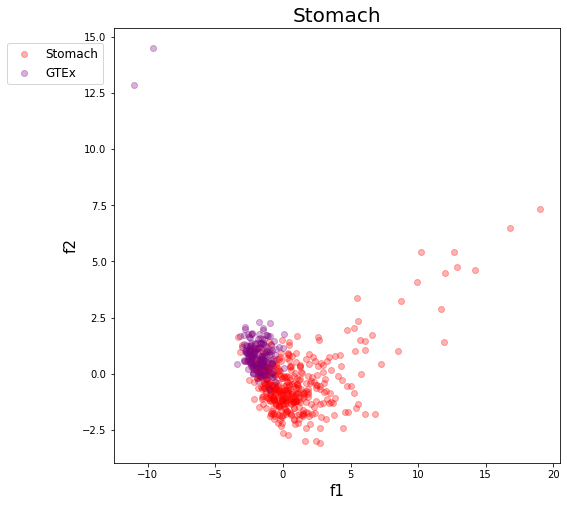

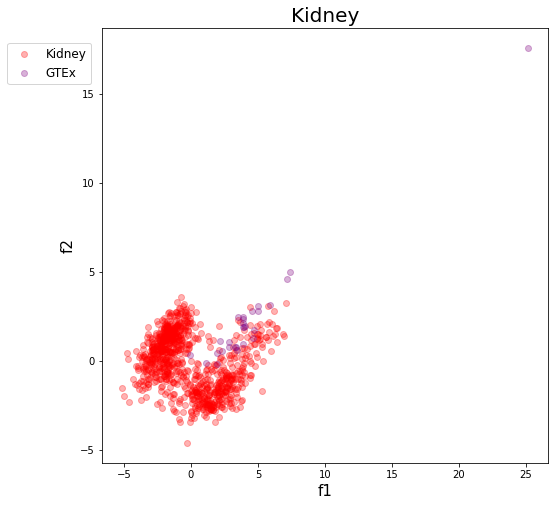

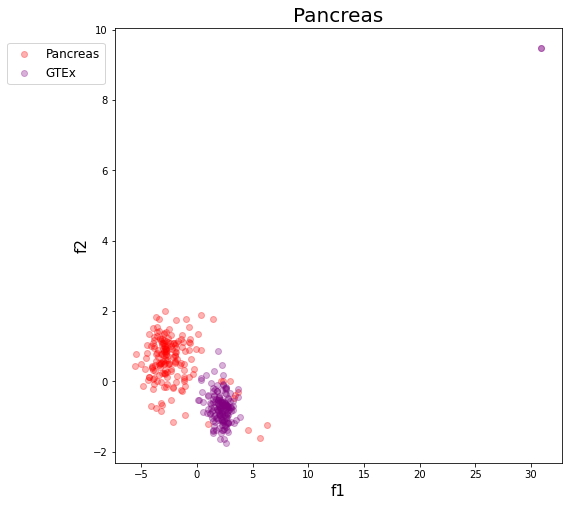

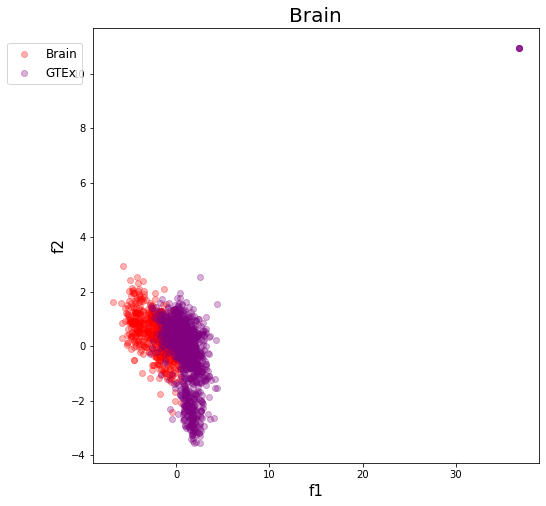

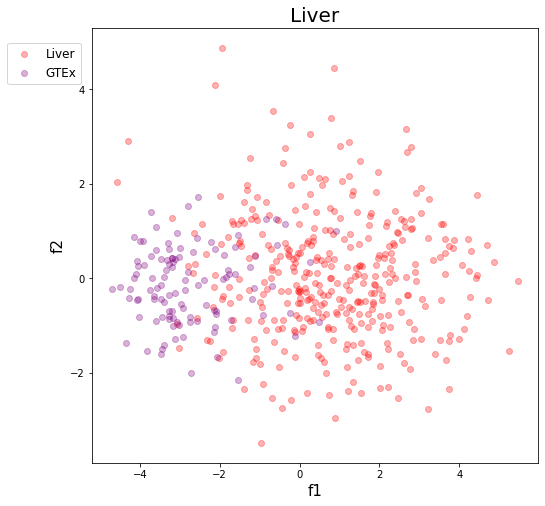

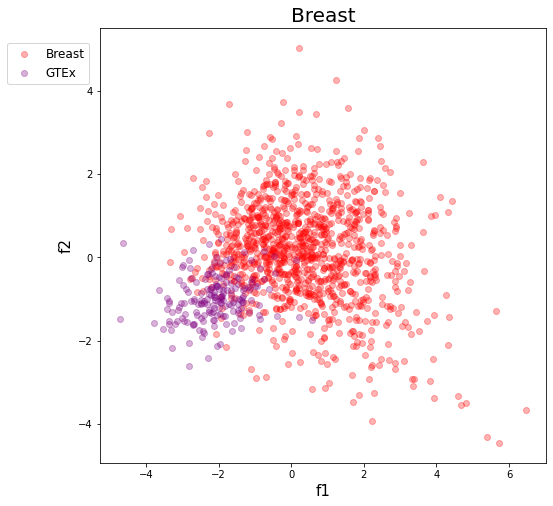

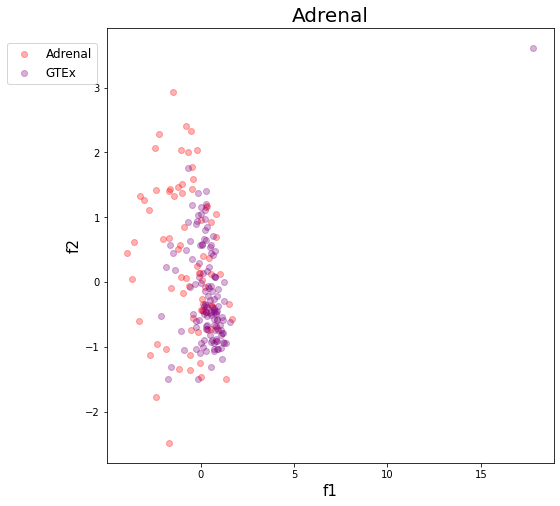

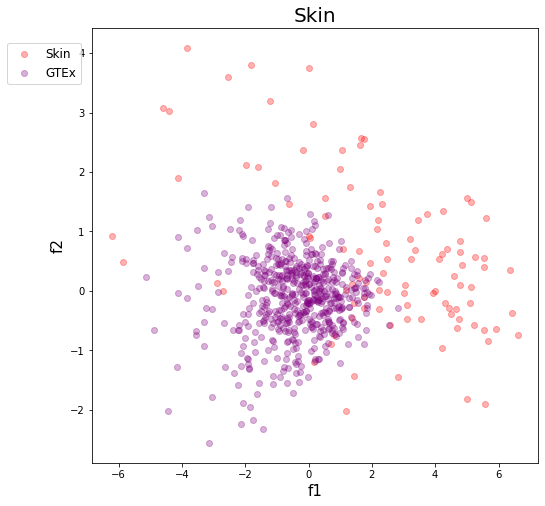

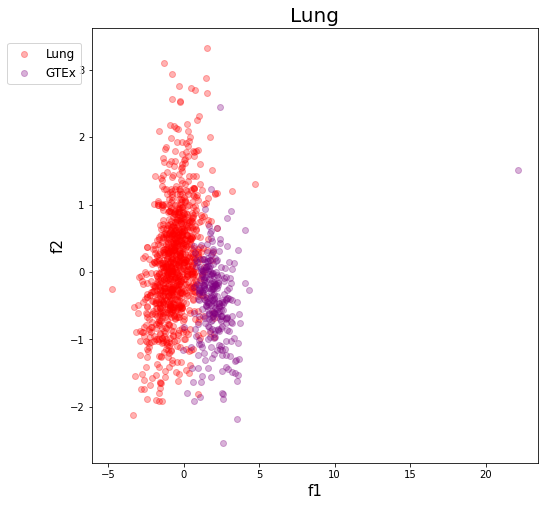

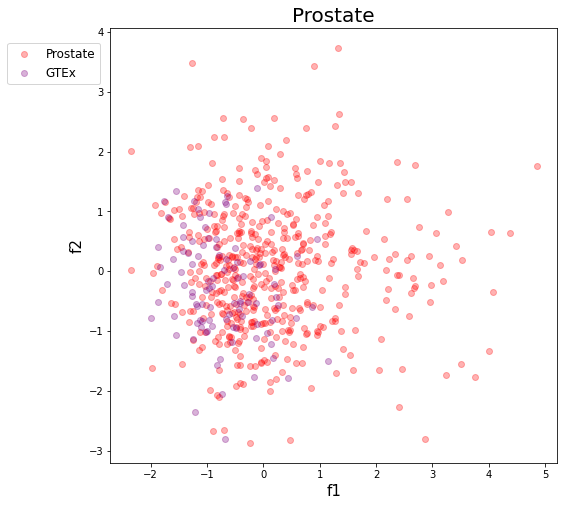

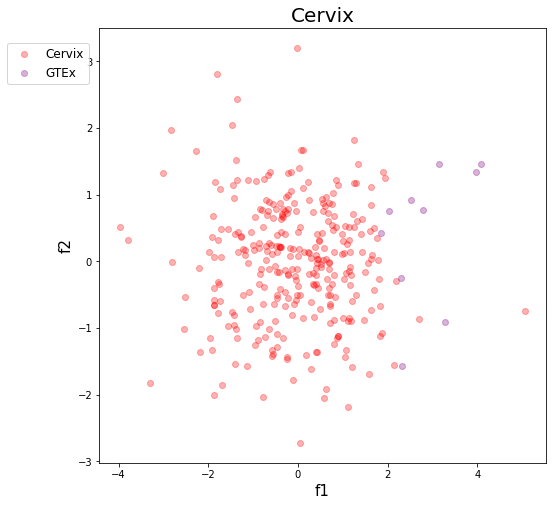

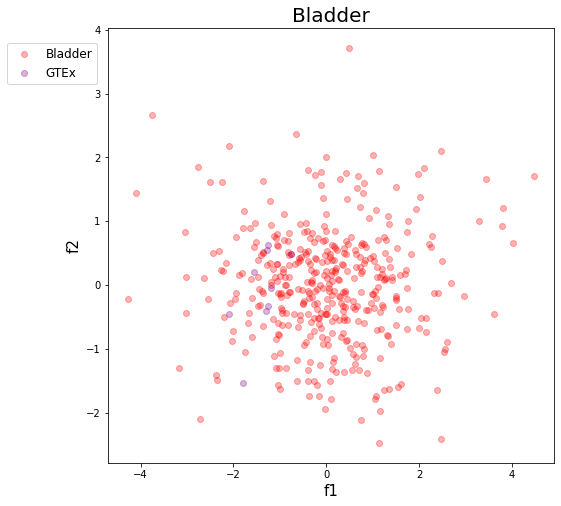

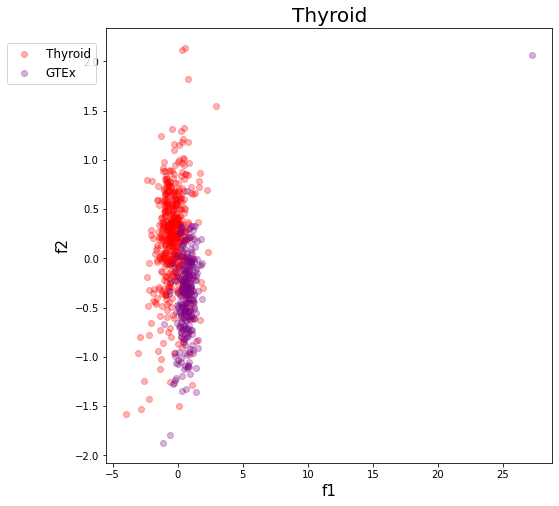

In [ ]:
for i in cancer_label['cancer']:
    d = pd.read_csv(f'./New_Data/cancer_biomarker/103/{i}.csv')
    
    df_label = pd.read_csv('./New_Data/Cancer_label_19.csv')
    
    df_label.rename(columns={'label_GTEx_100':'label'}, inplace=True)
    d=pd.merge(d,df_label,left_on='label',right_on='label',how='left')
    
    features = cancer_label[cancer_label['cancer']==i]['SLC'].values[0] # slc_list
    if len(features) < 2:
        continue;
    
    x = d.drop(['label','cancer'], axis=1).values 
    x = StandardScaler().fit_transform(x) 

    pca = PCA(n_components=2)
    printcipalComponents = pca.fit_transform(x)

    principalDf = pd.DataFrame(data=printcipalComponents, columns = ['f1','f2'])

    label = d['label']
    label = label.to_list()

    finalDf = principalDf 
    finalDf['label'] = label
    
    targets = []
    for la in finalDf['label'].unique():
        targets.append(la)
        
    cancers = []
    for ca in d['cancer'].unique():
        cancers.append(ca)

    colors=['red','purple']
    
    fig = plt.figure(figsize = (8, 8))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('f1', fontsize = 15)
    ax.set_ylabel('f2', fontsize = 15)
    #ax.set_ylim(-5,10)
    ax.set_title(f'{i}', fontsize=20)
    
    
    for target,color,cancer in zip(targets,colors,cancers):
        indicesToKeep = finalDf['label'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'f1']
                   , finalDf.loc[indicesToKeep, 'f2']
                   , c=color
                   , cmap = plt.cm.rainbow
                   , alpha=0.3)

    lg=ax.legend(cancers, fontsize=12, bbox_to_anchor=(-0.01, 0.98))

    plt.savefig(f'./Figure/Cancer_PCA_TSNE/{i}_PCA.png',bbox_extra_artists=(lg,),bbox_inches='tight') 


In [ ]:
#3d
# import plotly.express as px
# from sklearn.decomposition import PCA
# import plotly.graph_objects as go

# X = d.drop(['label'], axis=1).values 

# pca = PCA(n_components=3)
# components = pca.fit_transform(X)

# total_var = pca.explained_variance_ratio_.sum() * 100

# fig = go.Figure(data = [go.Scatter3d(x = components[:,0],
#                                      y = components[:,1],
#                                      z = components[:,2],
#                                      mode = 'markers',
#                                      marker = dict(
#                                          size = 5,
#                                          color=d['label'],
#                                          colorscale='Viridis',
#                                          opacity=0.2)
#                                     )])
# fig.show()

## t-SNE

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 834 samples in 0.000s...
[t-SNE] Computed neighbors for 834 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 834 / 834
[t-SNE] Mean sigma: 0.058827
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.527866
[t-SNE] KL divergence after 300 iterations: 0.245669
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 595 samples in 0.001s...
[t-SNE] Computed neighbors for 595 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 595 / 595
[t-SNE] Mean sigma: 0.492032
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.108768
[t-SNE] KL divergence after 300 iterations: 0.570809
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1803 samples in 0.003s...
[t-SNE] Computed neighbors for 1803 samples in 0.107s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1803
[t-SNE] Computed conditional probabilities for sample 1803 / 1803
[

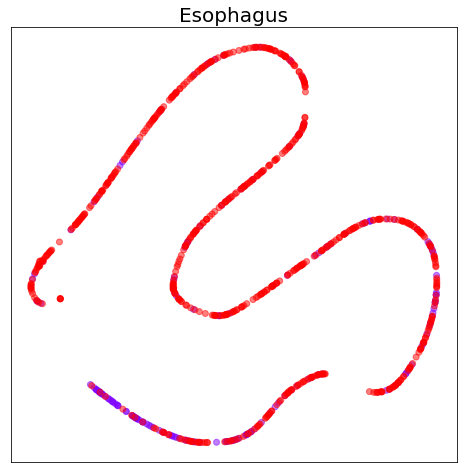

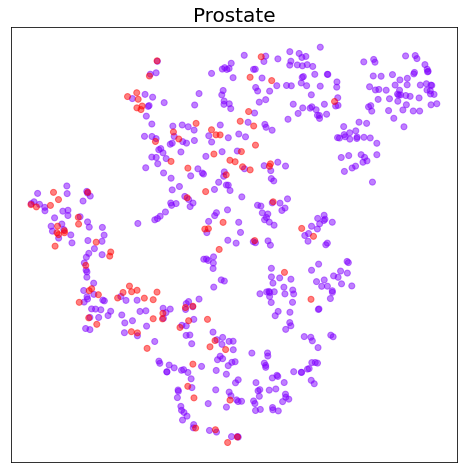

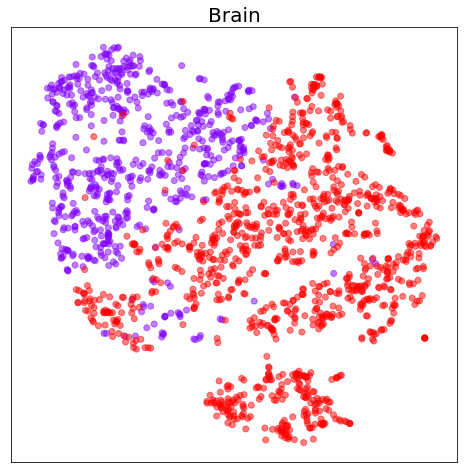

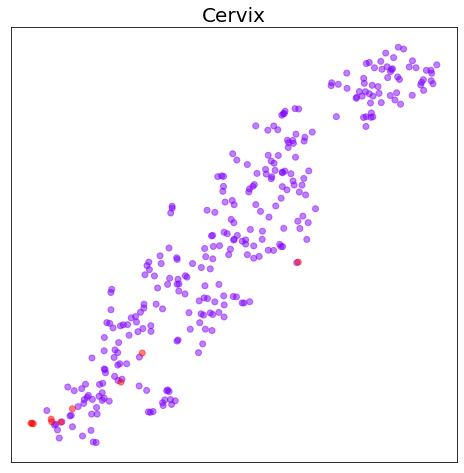

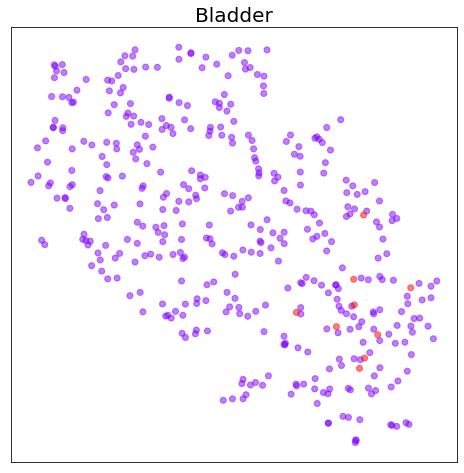

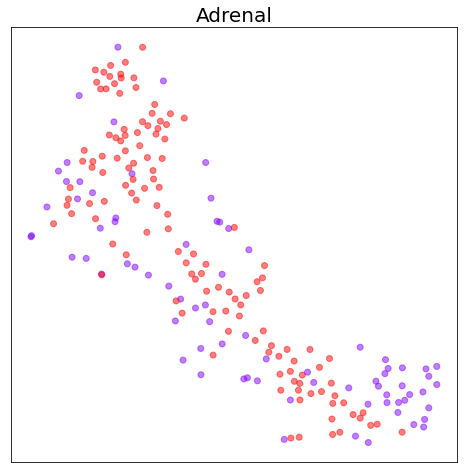

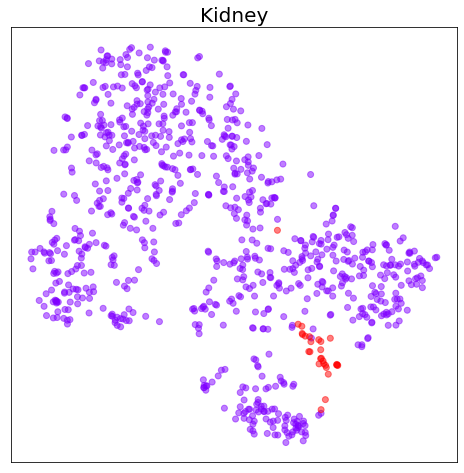

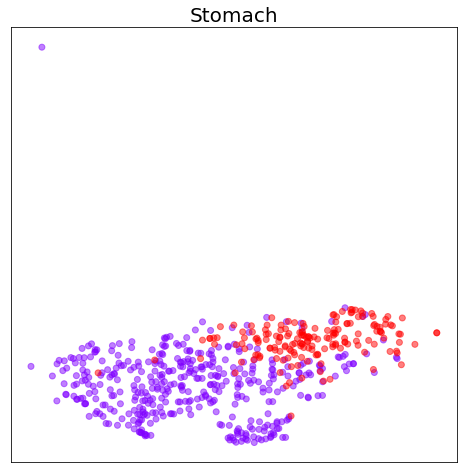

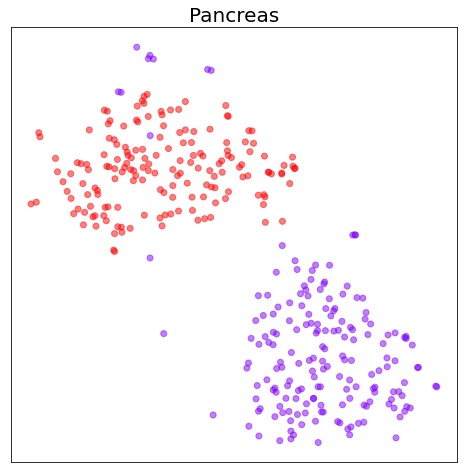

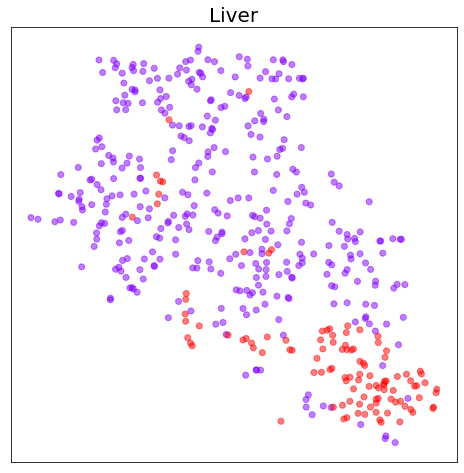

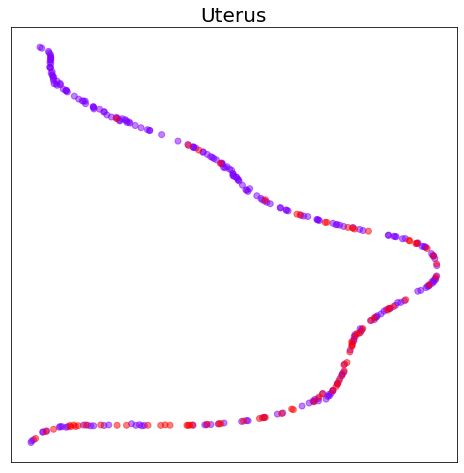

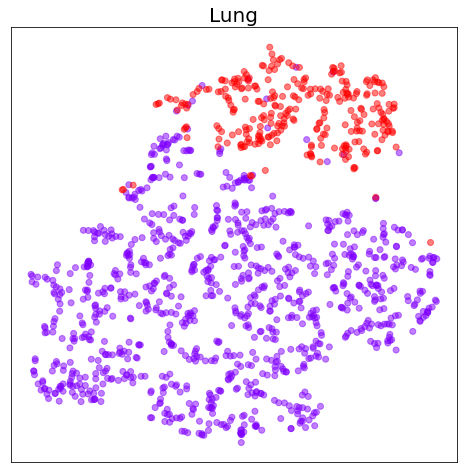

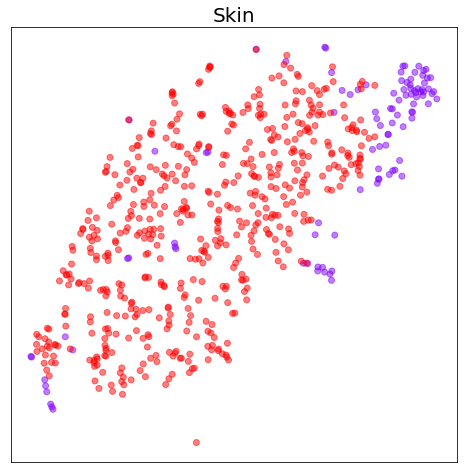

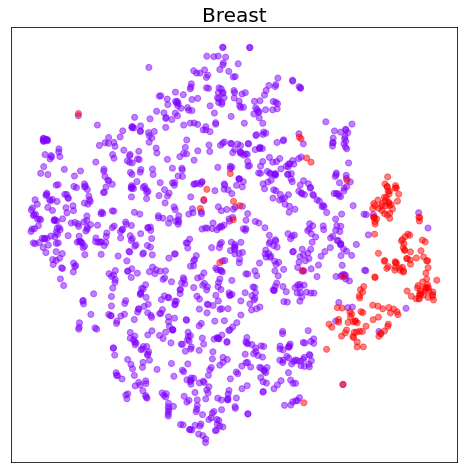

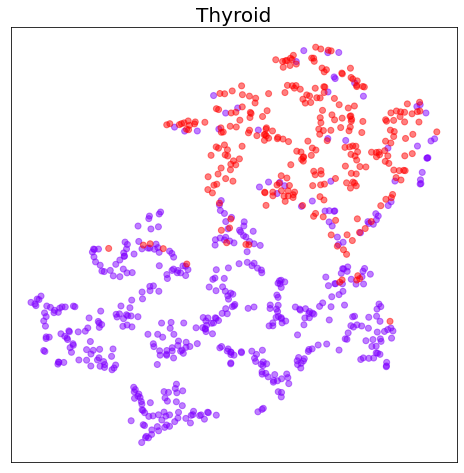

In [ ]:
for i in cancer_label['cancer']:
    d = pd.read_csv(f'./New_Data/cancer_biomarker/103/{i}.csv')
    

    tsne = TSNE(n_components = 2, verbose = 1, n_iter = 300) # , perplexity = 40
    x = d.drop(['label'], axis=1).values 
    tsneNDArray = tsne.fit_transform(x)
    label = d['label']
    label = label.to_list()
    figure, axesSubplot = plt.subplots(figsize = (8, 8))

    axesSubplot.scatter(tsneNDArray[:, 0], tsneNDArray[:, 1], c=label, cmap=plt.cm.rainbow, alpha=0.5) #c=label
    axesSubplot.set_xticks(()) 
    axesSubplot.set_yticks(())
    axesSubplot.set_title(f'{i}', fontsize=20)


    plt.savefig(f'./Figure/Cancer_PCA_TSNE/{i}_TSNE.png')
